## EDA & Data Visualization

Problem Statement:  We are tasked with creating an automated system to estimate the annual medical charges for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence. Estimates from the system will be used to determine the annual insurance premium offered to the customer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As we can see there are no null values. However, let's check for duplicates.

In [5]:
df.duplicated().sum()

1

In [6]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

We found a single duplicate which is dropped now.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


Now let us distinguish the Body Mass Indexes into the following categories:

In [9]:
def bmi_to_cat(bmi: float) -> str:
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'Normal Weight'
    elif 25 <= bmi < 30: return 'Overweight'
    elif 30 <= bmi < 35: return 'Obese'
    elif 35 <= bmi < 40: return 'Severely Obese'
    elif 40 <= bmi: return 'Morbidly Obese'
    
df.insert(3, 'bmi_cat', df['bmi'].apply(bmi_to_cat))
df.head()

,age,sex,bmi,bmi_cat,children,smoker,region,charges
0,19,female,27.900,Overweight,0,yes,southwest,16884.92400
1,18,male,33.770,Obese,1,no,southeast,1725.55230
2,28,male,33.000,Obese,3,no,southeast,4449.46200
3,33,male,22.705,Normal Weight,0,no,northwest,21984.47061
4,32,male,28.880,Overweight,0,no,northwest,3866.85520


In [10]:
fig = px.scatter(df, x="bmi", y="age", color="bmi_cat")
fig.show()

Let's dive deep into visualizing different categorical variables with respect to charges.

In [11]:
pd.crosstab(df.sex, df.smoker, margins = True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,516,159,675
All,1063,274,1337


In [12]:
fig = px.box(df, x="sex", y="charges", color="smoker")
fig.show()

Observations:
For most customers, the annual medical charges are about 10,000 dollars. But there are few outliers who have higher medical expenses, possibly due to some other reasons.
However, there is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300 dollars, the median for smokers is close to 32,000 dollars.

In [13]:
pd.crosstab([df.sex, df.smoker], df.bmi_cat, margins = True)

bmi_cat        Morbidly Obese  Normal Weight  Obese  Overweight  \
sex    smoker                                                     
female no                  33             89    160         168   
       yes                  7             28     27          31   
male   no                  37             86    156         144   
       yes                 14             22     47          43   
All                        91            225    390         386   

bmi_cat        Severely Obese  Underweight   All  
sex    smoker                                     
female no                  89            8   547  
       yes                 18            4   115  
male   no                  86            7   516  
       yes                 32            1   159  
All                       225           20  1337

In [14]:
fig = px.histogram(df, x='bmi_cat', color='sex', barmode='group', facet_col='smoker')
fig.show()

In [15]:
a = df.groupby(['sex','smoker','bmi_cat'])['charges'].mean().reset_index()
a.head(24)

,sex,smoker,bmi_cat,charges
0,female,no,Morbidly Obese,8765.530138
1,female,no,Normal Weight,8168.805664
2,female,no,Obese,9073.602635
3,female,no,Overweight,8427.927867
4,female,no,Severely Obese,9641.476742
5,female,no,Underweight,6366.336356
6,female,yes,Morbidly Obese,46505.912930
7,female,yes,Normal Weight,19618.968270
8,female,yes,Obese,39420.306286
9,female,yes,Overweight,22479.403700


In [16]:
fig = px.bar(a, x="sex", y="charges", color="bmi_cat", barmode='group')
fig.show()

Here we can observe that the average charges for non-smoking males & females of different bmi categories, is almost 10,000 dollars. Both genders who happen to be smokers as well as any form of obese, have average charges as high as 50,000 dollars. 

In [17]:
pd.crosstab(df.region, df.bmi_cat, margins = True)

bmi_cat,Morbidly Obese,Normal Weight,Obese,Overweight,Severely Obese,Underweight,All
region,,,,,,,
northeast,15,73,90,98,38,10,324
northwest,8,63,104,107,35,7,324
southeast,55,41,94,80,94,0,364
southwest,13,48,102,101,58,3,325
All,91,225,390,386,225,20,1337


In [18]:
fig = px.strip(df, x="region", y="charges", color="bmi_cat")
fig.show()

In [19]:
pd.crosstab(df.region, df.smoker, margins = True)

smoker,no,yes,All
region,,,
northeast,257,67,324
northwest,266,58,324
southeast,273,91,364
southwest,267,58,325
All,1063,274,1337


In [20]:
fig = px.strip(df, x="region", y="charges", color="smoker")
fig.show()

We see that the southeaster part of U.S is leading in charges but majority of all customers from all parts of US are charged between 0-20k only.

In [21]:
fig = px.scatter(df, x="age", y="charges", color="smoker")
fig.show()

Observations:

1. Medical charges increase with age, which is a quite natural trend.

2. We can see three clusters of points, each of which seems to form a line with an increasing slope:

i. The first cluster consists of non-smokers who have relatively low medical charges compared to others.

ii. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with other medical issues" and "smokers without major medical issues".

iii. The final cluster consists of smokers with major medical issues that are possibly related to or worsened by smoking.

In [22]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker')
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

In [23]:
fig = px.ecdf(df, x="charges", color="smoker")
fig.show()

Observation:
Almost 67% of non-smokers have medical charges of 10,000 dollars or less. Whereas, for smokers, the charges start only from nearly 13,000 dollars, and almost 55% of smokers have medical charges more than 30,000 dollars. 

In [24]:
fig = px.ecdf(df, x="charges", color="sex")
fig.show()

It can be seen that almost 61% of both males & females have medical charges of equal to or less than 12,000 dollars. However, after that point, the percentage of females seem to increase by a bit.

In [25]:
fig = px.scatter_3d(df, x='age', y='bmi', z='charges', color='smoker')
fig.update_traces(marker_size=5, marker_opacity=0.5)
fig.show()

We can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss (rmse).

## Getting Dummy Variables 

In [26]:
df.drop(['bmi_cat'],axis=1,inplace=True)

In [27]:
columns_cat = ['sex','smoker','region']
df_encoded = pd.get_dummies(df, columns=columns_cat)
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## Correlation Matrix

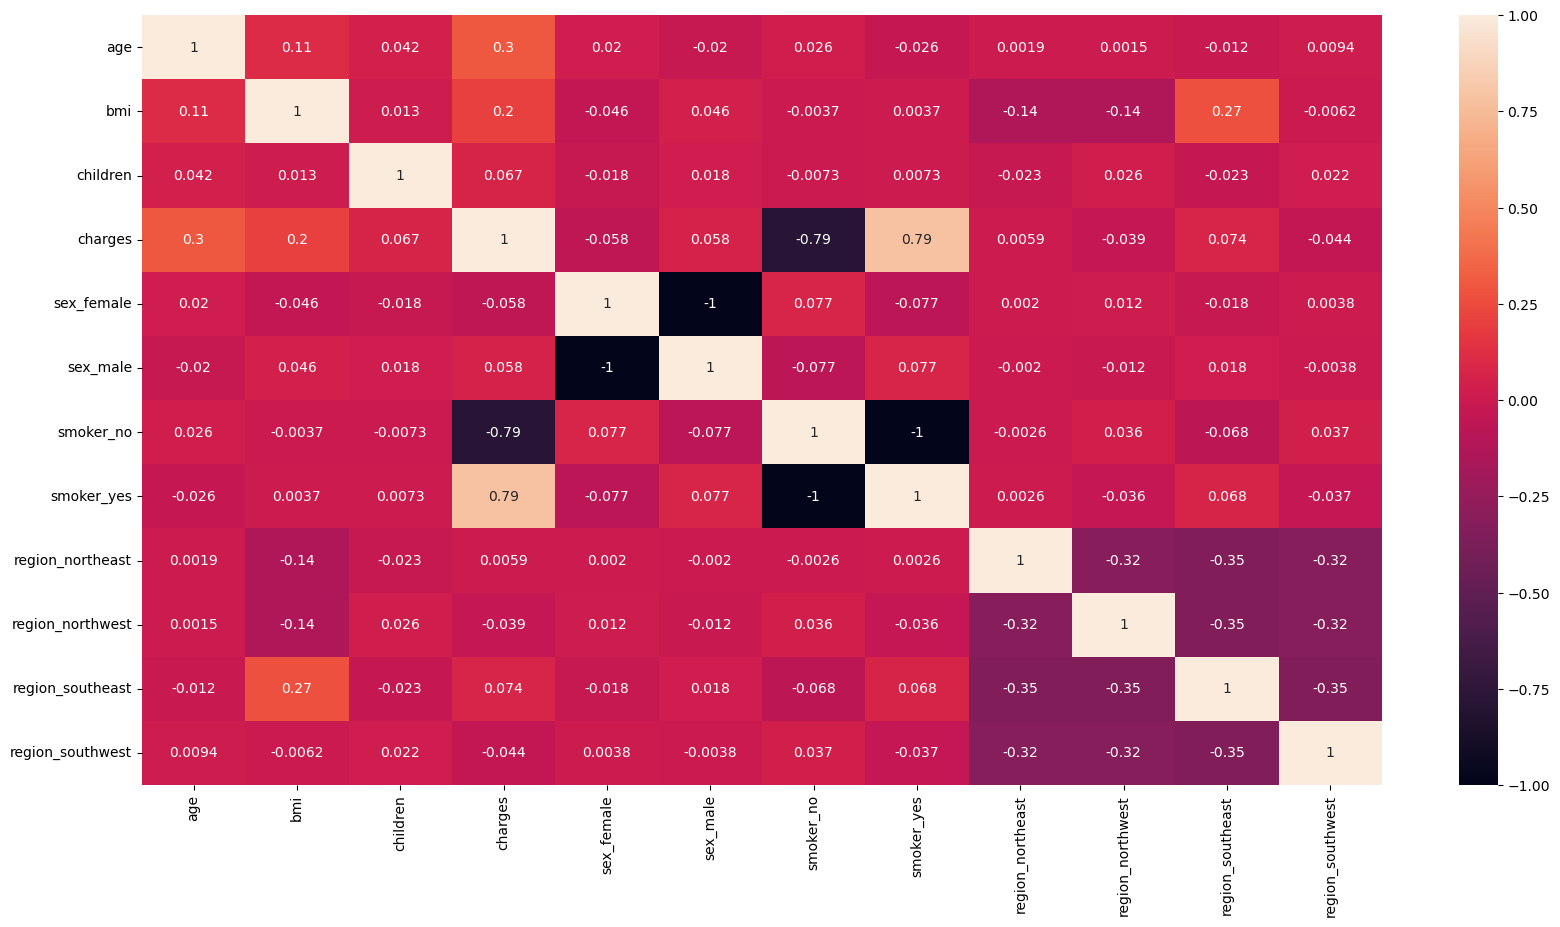

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

We see that smoker_yes is highly correlated with charges.
Also, age and bmi have positive correlation with charges.

## Simple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [30]:
x = df['age']
y = df['charges']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [31]:
slr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [32]:
slr.coef_

array([280.53645673])

In [33]:
slr.intercept_

2469.6126993128655

In [34]:
slr_pred = slr.predict(x_test.values.reshape(-1,1))

In [35]:
fig = px.scatter(x=y_test, y=slr_pred, labels={'x':'Actual','y':'Predicted'})
fig.show()

Majority of the predictions are not close to the actual charges. Hence we need to add more features to create a better model.

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,slr_pred)
rmse = np.sqrt(mean_squared_error(y_test,slr_pred))
r2 = np.abs(r2_score(y_test,slr_pred))

print('MSE:',mse)
print('RMSE:',rmse)
print('R square:',r2)

MSE: 124872458.07532875
RMSE: 11174.634583525707
R square: 0.04760860883446105


Assumptions:
1. Linearity Check

In [37]:
px.scatter(df, x='age', y='charges', trendline='ols', trendline_color_override = 'red')

2. Normality of Residuals

In [38]:
residual = y_test - slr_pred

In [39]:
import plotly.figure_factory as ff
fig = ff.create_distplot(hist_data=[residual.tolist()], group_labels=['residual'], bin_size=[50])
fig.show()

3. Homoscedasticity

In [40]:
fig = px.scatter(x=slr_pred, y=residual, labels={'x':'Predicted','y':'Residual'})
fig.show()

4. No Autocorrelation of Errors

In [41]:
px.line(list(residual))

## Multiple Linear Regression

In [42]:
X=df_encoded.drop(['charges'], axis=1)
Y=df_encoded['charges']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

In [44]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [45]:
mlr_pred = mlr.predict(x_test)

In [46]:
fig = px.scatter(x=y_test, y=mlr_pred, labels={'x':'Actual','y':'Predicted'})
fig.show()

In [47]:
mse = mean_squared_error(y_test,mlr_pred)
rmse = np.sqrt(mean_squared_error(y_test,mlr_pred))
r2 = np.abs(r2_score(y_test,mlr_pred))

print('MSE:',mse)
print('RMSE:',rmse)
print('R square:',r2)

MSE: 31814749.20047716
RMSE: 5640.456470931866
R square: 0.7573516713161299


In [48]:
mlr.coef_

array([   264.42482253,    306.13118015,    562.4537963 ,     96.88141056,
          -96.88141056, -11999.74358009,  11999.74358009,    532.23700839,
          164.02413352,    -44.10923987,   -652.15190205])

In [49]:
mlr.intercept_

217.49650813551307

In [50]:
columns = ['age', 'bmi', 'children', 'smoker_yes', 'smoker_no','sex_male', 'sex_female', 
                 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

weights_df_encoded = pd.DataFrame({'features': np.append(columns, 1),'weights': np.append(mlr.coef_ , mlr.intercept_)})
weights_df_encoded

,features,weights
0,age,264.424823
1,bmi,306.131180
2,children,562.453796
3,smoker_yes,96.881411
4,smoker_no,-96.881411
5,sex_male,-11999.743580
6,sex_female,11999.743580
7,region_northeast,532.237008
8,region_northwest,164.024134
9,region_southeast,-44.109240


While it seems like "sex_female" ,"region_northeast","bmi" have a higher weight than age, keep in mind that the range of values for "sex_female" and "region_northeast" columns only take the values 0 and 1, while that of bmi ranges from 15 to 53.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different columns to identify which features are important.
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason, it's common practice to scale (or standardize) the values in numerical columns.

We can apply scaling using the StandardScaler class from scikit-learn.

In [51]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df_encoded[numerical_columns])

StandardScaler()

In [52]:
scaled_columns = scaler.transform(df_encoded[numerical_columns])
categorical_columns = ['smoker_yes', 'smoker_no','sex_male', 'sex_female', 
              'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
categorical_data = df_encoded[categorical_columns].values

In [53]:
x = np.concatenate((scaled_columns, categorical_data), axis=1)
y = df_encoded.charges

In [54]:
model = mlr.fit(x, y)
predictions = model.predict(x)

In [55]:
mse = mean_squared_error( y, predictions )
rmse = np.sqrt(mean_squared_error( y, predictions ))
r2 = np.abs(r2_score( y, predictions ))

print('MSE:',mse)
print('RMSE:',rmse)
print('R square:',r2)

MSE: 36528121.63726907
RMSE: 6043.849901947357
R square: 0.7507482551410236


In [56]:
weights_df_encoded = pd.DataFrame({'features': np.append(numerical_columns + categorical_columns, 1),
                           'weights': np.append(mlr.coef_, mlr.intercept_)})
weights_df_encoded.sort_values('weights', ascending=False)

,features,weights
11,1,20329.945485
3,smoker_yes,11923.664422
0,age,3604.738802
1,bmi,2068.812016
7,region_northeast,586.143380
2,children,572.215898
8,region_northwest,236.916848
6,sex_female,64.740739
5,sex_male,-64.740739
10,region_southwest,-373.938006


As we can see now, the most important features are:
1. Smokers
2. Age
3. BMI

We need to check the multicollinearity among the significant independent variables, using VIF.

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_encoded[['smoker_yes', 'age', 'bmi', 'region_northeast', 'children', 'sex_female']]

vif_data = pd.DataFrame()
vif_data["features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

           features       VIF
0        smoker_yes  1.251830
1               age  7.731824
2               bmi  8.535734
3  region_northeast  1.286603
4          children  1.798456
5        sex_female  1.912356


As we can see, age and bmi have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the age of a person does influence their bmi. Hence, considering these two features together leads to a model with high multicollinearity.

In [58]:
X = df_encoded[['smoker_yes', 'age', 'region_northeast', 'children', 'sex_female']]

vif_data = pd.DataFrame()
vif_data["features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

           features       VIF
0        smoker_yes  1.218482
1               age  2.800464
2  region_northeast  1.281118
3          children  1.720478
4        sex_female  1.815517


Looking at the VIF values, our model does not exhibit any multicollinearity. Now, we can trust the model coefficients. 

In [59]:
import statsmodels.api as sm
X = sm.add_constant(df_encoded[['age','smoker_yes','region_northeast','children','sex_female']])
Y = df_encoded['charges']

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

In [61]:
df_encoded_model1 = sm.OLS(y_train,x_train).fit()
df_encoded_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.722     
Dependent Variable:   charges            AIC:                  19084.1478
Date:                 2023-04-01 08:06   BIC:                  19113.1910
No. Observations:     935                Log-Likelihood:       -9536.1   
Df Model:             5                  F-statistic:          486.9     
Df Residuals:         929                Prob (F-statistic):   1.27e-256 
R-squared:            0.724              Scale:                4.2567e+07
-------------------------------------------------------------------------
                   Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const            -2944.4421 709.3398 -4.1510 0.0000 -4336.5363 -1552.3479
age                275.5462  15.1119 18.2337 0.0000   245.8888   305.2036
smoker_yes       24110.2428 530.3857 45.4579 0.0000 23069.3497 25151.1358
region_northeast    92.5143 502.5607  0.1841 0.8540  -893.7716  1078.8002
children           581.8644 179.5576  3.2405 0.0012   229.4789   934.2499
sex_female          74.0536 428.3195  0.1729 0.8628  -766.5324   914.6395
-------------------------------------------------------------------------
Omnibus:                181.882         Durbin-Watson:            1.992  
Prob(Omnibus):          0.000           Jarque-Bera (JB):         417.336
Skew:                   1.056           Prob(JB):                 0.000  
Kurtosis:               5.500           Condition No.:            146    
=========================================================================

"""

Since the P values for region_northeast and sex_female are not-significant, let’s drop these terms to build the final model.

In [62]:
significant_variables = ['smoker_yes', 'age', 'children']
x_train = x_train[significant_variables] 
x_test = x_test[significant_variables]
df_encoded_model2 = sm.OLS(y_train, x_train).fit() 
df_encoded_model2.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.870     
Dependent Variable:     charges          AIC:                         19097.3325
Date:                   2023-04-01 08:06 BIC:                         19111.8541
No. Observations:       935              Log-Likelihood:              -9545.7   
Df Model:               3                F-statistic:                 2084.     
Df Residuals:           932              Prob (F-statistic):          0.00      
R-squared (uncentered): 0.870            Scale:                       4.3309e+07
----------------------------------------------------------------------------------
                  Coef.      Std.Err.      t      P>|t|      [0.025       0.975]  
----------------------------------------------------------------------------------
smoker_yes      23741.6428   527.4160   45.0150   0.0000   22706.5823   24776.7034
age               216.9107     7.0870   30.6069   0.0000     203.0023     230.8190
children          375.0234   174.4923    2.1492   0.0319      32.5800     717.4668
--------------------------------------------------------------------------------
Omnibus:                   186.518           Durbin-Watson:              1.983  
Prob(Omnibus):             0.000             Jarque-Bera (JB):           408.230
Skew:                      1.101             Prob(JB):                   0.000  
Kurtosis:                  5.372             Condition No.:              102    
================================================================================

"""

In [63]:
mlr_pred = df_encoded_model2.predict(x_test)

In [64]:
mse = mean_squared_error(y_test,mlr_pred)
rmse = np.sqrt(mean_squared_error(y_test,mlr_pred))
r2 = np.abs(r2_score(y_test,mlr_pred))

print('MSE:',mse)
print('RMSE:',rmse)
print('R square:',r2)

MSE: 37336387.28829204
RMSE: 6110.350831850168
R square: 0.7152386172366281


Assumptions:
1. There must be a linear relationship between the outcome variable and the independent variables.  Scatterplots can show whether there is a linear or curvilinear relationship.

In [65]:
fig = px.scatter_3d(df_encoded, x='age', y='children', z='charges', color='smoker_yes')
fig.update_traces(marker_size=5, marker_opacity=0.5)
fig.show()

2. Multivariate Normality: Multiple regression assumes that the residuals are normally distributed.

In [66]:
residual = y_test - mlr_pred

In [67]:
fig = ff.create_distplot(hist_data=[residual.tolist()], group_labels=['residual'], bin_size=[50])
fig.show()

3. No Multicollinearity: Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values, which we have already done.